# Self-Orginizing Maps

In this and following few chapters we will continue with the third core type of methods widely used for data visualization and latent structure discovery: $\textit{artificial neural network}$ (ANN) methods. I should point out that this was more the name used for these type of methods when they were developed, but more recently you can find some of these ANNs used as building blocks for more complex (computationally not necessarily conceptually) $\textit{deep learning}$ techniques.



The self-organizing maps (SOM) or Kohonen maps are a type of a neural networks which are trained in unsupervised way (unlike the most popular network architectures) to produce a low dimensional, discretized representation of the input space, or with other words a map. SOM differ from other neural networks in the way they are trained; they apply competitive learning procedure as opposed to error-correction learning. In addition to that, SOM use explicitly defined neighborhood function which determines the ability of the network to preserve the topological properties of the input space. In that way SOMs are somewhat similar to the manifold embedding algorithms we studied in the last few chapters, with the key difference that SOMs will not be aiming to directly learn lower dimensional projection variables to the input data, but merely a grid of nodes and weights, that encode well the input space. The number of nodes stays fixed and depends on the desing of the SOM where the weights associated with each node determine the assume location of the nodes in the high dimensional input space. This discretization of the input space inherently acts as cluster preserving mapping and this is why often SOMs are also considered as a clustering algorithm. 
SOMs are associated with certain grid type, i.e. square grid in the simplest case and SOMs learn a pooling of this grid which best describes the data. This pooling is described by the inferred node locations and distances between nodes in the trained grid. 
The goal of the SOM is to cause different parts of the grid shaped network to respond similarly to certain input patterns. 

# Self-Orginizing Maps - definition

The SOM network typically consists of two layers of nodes, the input layer and the output layer. In SOM the input layer of $\textit{source nodes}$ is directly connected to the output layer of $\textit{computation nodes}$ without any hidden layers.


The output layer, also known as “Kohonen layer” or “SOM layer”, represents a low dimensional map of the data. Nodes in the output layer are arranged in form of a topological architecture or grid. The number of nodes in the output layer denotes the maximum number of clusters which your map can account for (theoretically). The number of map unites will affect the trade-off of accuracy and generalization capability of your SOM. Typically the network topology is arranged in either a rectangular or hexagonal grid in the traditional SOM. Assume that each input point is represented by a vector $y\in R^D$. Let us denote the weight vectors associated with the output layers as $w_k\in R^D$  for $k=1,\dots,K$ indicating each of the $K$ nodes in the output layer. The weights $w$ are links that connect the input nodes to the output nodes are updated during training.  

The most common initialization method assigns preferably small random values to the weight vectors of nodes in the network. Alternatively, a more effective approach is to initialize the weight vectors along the two-dimensional linear subspace that is spanned by the eigenvectors corresponding to the largest eigenvalues computed from the input data.

The weights are updated using $\textit{competitive learning}$. At each step we randomly select a data point $y_i$ from the input space. Then, we find the node closest to the selected point, also referred to as the best matching unit (BMU), by finding:
\begin{equation}
 z_i = arg min_k \lVert y_i - w_k\rVert
\end{equation}
Then, by having identified the BMU from point $y_i$ encoded in $z_i$, we proceed with updating the weight only for that unit (or in some cases the neighbors of it as well). This is done by adopting the update 
\begin{equation}
w_{z_i}^{(t+1)} = w_{z_i}^{(t)} + \alpha(t)\left [ y_i^{(t)} - w_{z_i}^{(t)}\right ]
\end{equation}
where the superscript $t$ denotes the value of the weight at iteration $t$ is used to update the value of the weight for iteration $t+1$; $\alpha(t)$ is also called learning rate and controls the rate of change of the weight vectors for the SOM. In SOMs, the learning rate gradually decreases as a function of the iteration step index $t$. That means, while the step index increases, the learning rate might decrease linearly, exponentially, geometrically or in any other way we wish to define. In SOMs we also update the nodes neighboring the BMU using either the exact same update from above but now for the weights of the nodes closest to the BMU, or more generally if node $c$ is in the neighborhood of BMU associated with $y_i$ denoted by $z_i$:
\begin{equation}
w_c^{(t+1)} = w_c^{(t)} + \alpha(t)h_{z_{i}c}^{(t)}\left [ y_i^{(t)} - w_c^{(t)}\right ]
\end{equation}
with $h_{z_{i}c}^{(t)}$ denoting the neighborhood function of BMU pointed by $z_i$. The neighborhood function usually decreases for points further away from the BMU and can be discrete or continious. For example, we can assume that $h_{z_{i}c}$ is discrete and it takes values of $0$ for all but the closest four neighboring nodes and value $1$ for the direct neighbors of the BMU. Continious neighborhood functions lead to smoother neighborhood kernel. The most widely used function of this type is the Gaussian function which decrease in both spatial and time domains:
\begin{equation}
h_{z_{i}c}^{(t)} = \exp\left(-\frac{d_{z_{i}c}^2}{2\sigma^2(t)}\right)
\end{equation}
where $d_{z_{i}c}$ denotes the lateral distance between the winning neuron $z_i$ and the excited neuron $c$ and $\sigma(t)$ represents the effective width or radius  of neighborhood at iteration $t$. σ(t) is chosen to be monotonically decreasing function of time leading to a decrease in the value of the neighborhood function (as time increases smaller updates of the neighboring nodes are made).


# Summary

1. $\textbf{Initialization:}$ Choose the dimension and size of the output space. Assign random values or alternatively sample vectors drawn randomly from the training set to the initial weight vectors $w_k^{(0)}$ for $k=1,\dots,K$. Specify the neighborhood function as well as the functional form of the learning rate $\alpha(0)$ and radius of the neighborhood $\sigma(0)$. Assign starting values for $\alpha(0)$ and $\sigma(0)$. Normalize training data. Define a critical threshold value $T$ for the maximum number of iterations. Set iteration index $t = 1$.

2. $\textbf{Sampling:}$. Randomly select an input vector $y_i$ from the training data set.
3. $\textbf{Similarity Matching:}$ Compute the Euclidean distances between the input vector and each output node’s weight vector and find the best matching node $c$ at iteration $t$ by applying the minimum distance criterion:
\begin{equation}
c = argmin_j \lVert y_i - w_k^{(t)}\rVert \text{ for } k=1,\dots,N
\end{equation}

4. $\textbf{Weight Updating:}$ Adjust the weights of the winning node and its neighborhood according to their distances to the winning node by using the update formula:
\begin{equation}
w_{z_i}^{(t +1)} = w_{z_i}^{(t)} + \alpha(t)h_{z_{i}c}^{(t)}[x(t)−w_{z_i}^{(t)}]
\end{equation}
For the winning node the neighborhood function $h_{z_{i}c}^{(t)}$ will be equal to 1.

5. $\textbf{Parameter Adjustment:}$ Set $t = t+1$. Adjust the neighborhood size and the learning rate. 

6. $\textbf{Continuation:}$ Keep returning to Step 2 until the change of the weights is less than
a prespecified threshold value or the maximum number $T$ of iterations is reached. Otherwise stop.


# Quality of the map

SOM has the ability to produce simpler low-dimensional representations of complex high-dimensional data at the expense of information loss during the projection. This representation of topological relations and abstract structures is an approximation of the local, rather than the global, probability density of a given sample data set. This explains why the outputs of an SOM can vary highly depending on the initial setting of parameters such as the number of output nodes, the learning rate, and the update speed of the neighborhood. It is, therefore, necessary to examine the quality of the results in order to determine the parameter values which give the most appropriate representation of the data set. However, it should be noted that there are no generally accepted rules for the determination of the parameters a priori. To address these issues different measurement methods have been developed in the literature to evaluate and compare the quality of SOM outputs. In this respect, the most studied properties of SOM projections are learning quality and projection quality, where the first one is sometimes referred to as vector quantization and the latter one as topology preservation. Technically, there is a tradeoff between these two, the topology preservation quality usually decreases with increasing data representation accuracy. 

$\textbf{Quantization Error:}$ The Quantization Error (QE) provides a means to assess the quality of learning and
shows how good the map fits to data. It is computed by determining the average distance of the sample vectors to its best matching unit. The formula of the average quantization error is as follows:
\begin{equation}
QE = \frac{\sum_{i=1}^{N} \lVert y_i - w_c\rVert}{N}
\end{equation} 
where $w_c$ the weight associated with the BMU of point $y_i$ which changes with $i$. By increasing the number of output nodes for any given dataset, the QE can be reduced as the data samples are distributed more sparsely on the map. Here, the QE measure completely disregards the topological relations and because of the tradeoff between vector quantization and projection quality of the SOM, reducing the QE may lead to distortions of the map’s topology. Using a small neighborhood size can be used in order to achieve a small quantization error and a good approximation of input distribution. Note that a low QE may also imply an over fitted model.

\textbf{Topographic Error:} Topology preservation, i.e. projection quality, is a property that is more complex to
define and hard to measure. The most common quality measure for topology preservation is the Topographic Error (TE), which can be expressed as the percentage of data vectors for which the first and second BMUs are not adjacent units. The topographic error is computed as follows:
\begin{equation}
TE = \frac{1}{N}\sum_{i=1}^{N}u\left(y_i\right)
\end{equation}
where $N$ is the number of input samples, and $u \left( y_i \right) = 1$ if the best- and second bestmatching units of $y_i$ are non-adjacent, otherwise $u\left( y_i \right) = 0$. So, the less the violation of the neighborhood relations on the grid is, the better the SOM preserves the topology. Some have argued that this measure is unreliable for small maps, since the TE is almost too simplistic and suffers from the discrete nature of the output space. There are quite a few additional quality of fit measures that have been proposed for SOMs but we will not be going in detail through all of them. 

# Implementation

In [11]:
import numpy as np
import math
import random
import sklearn.datasets as ds
iris = ds.load_iris()
patterns = iris.data
classes = iris.target


sample_no = np.random.randint(0,len(patterns))


print("Sample pattern: " + str(patterns[int(sample_no)]))
print("Class of the above pattern: " + str(classes[int(sample_no)]))
#A heuristic formula for calculating no. of map units
#source: https://stackoverflow.com/questions/19163214/kohonen-self-organizing-maps-determining-the-number-of-neurons-and-grid-size

def mapunits(input_len,size='small'):
    
    heuristic_map_units = 5*input_len**0.54321
     
    if size == 'big':
        heuristic_map_units = 4*(heuristic_map_units)
    else:
        heuristic_map_units = 0.25*(heuristic_map_units)
        
    return heuristic_map_units
        
        
map_units = mapunits(len(patterns),size='big')
print("Heuristically computed appropriate no. of map units: "+str(int(map_units)))

#For reference purpose only - however this function can be used to automatically calculate the SOM dimensions
#from data length. I will still be specifying the SOM dimensions manually, anyway.

Sample pattern: [5.9 3.  5.1 1.8]
Class of the above pattern: 2
Heuristically computed appropriate no. of map units: 304


In [6]:
np.random.randint(0,len(patterns))

119

In [7]:
len(patterns)

150

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

def Eucli_dists(MAP,x):
    x = x.reshape((1,1,-1))
    #print(x)
    Eucli_MAP = MAP - x
    Eucli_MAP = Eucli_MAP**2
    Eucli_MAP = np.sqrt(np.sum(Eucli_MAP,2))
    return Eucli_MAP

input_dimensions = 4

map_width = 25
map_height = 25
MAP = np.random.uniform(size=(map_height,map_width,input_dimensions))
prev_MAP = np.zeros((map_height,map_width,input_dimensions))

radius0 = max(map_width,map_height)/2
learning_rate0 = 0.1

coordinate_map = np.zeros([map_height,map_width,2],dtype=np.int32)

for i in range(0,map_height):
    for j in range(0,map_width):
        coordinate_map[i][j] = [i,j]

epochs = 500
radius=radius0
learning_rate = learning_rate0
max_iterations = len(patterns)+1
too_many_iterations = 10*max_iterations

convergence = [1]

timestep=1
e=0.001 
flag=0

epoch=0
while epoch<epochs:
    
    shuffle = np.random.randint(len(patterns), size=len(patterns))
    for i in range(len(patterns)):
        
        # difference between prev_MAP and MAP
        J = np.linalg.norm(MAP - prev_MAP)
        #print(J)
        # J = || euclidean distance between previous MAP and current MAP  ||

        if  J <= e: #if converged (convergence criteria)
            flag=1
            break
            
        else:
            
            #if timestep == max_iterations and timestep != too_many_iterations:
            #    epochs += 1
            #    max_iterations = epochs*len(patterns)
            
            pattern = patterns[shuffle[i]]
            pattern_ary = np.tile(pattern, (map_height, map_width, 1))
            Eucli_MAP = np.linalg.norm(pattern_ary - MAP, axis=2)
            
            # Get the best matching unit(BMU) which is the one with the smallest Euclidean distance
            BMU = np.unravel_index(np.argmin(Eucli_MAP, axis=None), Eucli_MAP.shape)
            #BMU[1] = np.argmin(Eucli_MAP, 1)[int(BMU[0])]
    
            #Eucli_from_BMU = Eucli_dists(coordinate_map,BMU)  
        
            prev_MAP = np.copy(MAP)
             
            for i in range(map_height):
                for j in range(map_width):
                    distance = np.linalg.norm([i - BMU[0], j - BMU[1]])
                    if distance <= radius:
                        #theta = math.exp(-(distance**2)/(2*(radius**2)))
                        MAP[i][j] = MAP[i][j] + learning_rate*(pattern-MAP[i][j])
            
            learning_rate = learning_rate0*(1-(epoch/epochs))
            #time_constant = max_iterations/math.log(radius) 
            radius = radius0*math.exp(-epoch/epochs)
            #print([learning_rate, radius])
            
            timestep+=1
    if J < min(convergence):
        print('Lower error found: %s' %str(J) + ' at epoch: %s' % str(epoch))
        print('\tLearning rate: ' + str(learning_rate))
        print('\tNeighbourhood radius: ' + str(radius))
        MAP_final = MAP
    convergence.append(J)
    
    if flag==1:
        break
    epoch+=1

Lower error found: 0.9683214762742399 at epoch: 13
	Learning rate: 0.0974
	Neighbourhood radius: 12.179188620109366
Lower error found: 0.7668314232143377 at epoch: 17
	Learning rate: 0.0966
	Neighbourhood radius: 12.082143807968833
Lower error found: 0.7376631244816144 at epoch: 43
	Learning rate: 0.09140000000000001
	Neighbourhood radius: 11.469927890251887
Lower error found: 0.6099761293901546 at epoch: 46
	Learning rate: 0.0908
	Neighbourhood radius: 11.40131436931363
Lower error found: 0.5714191414466719 at epoch: 115
	Learning rate: 0.07700000000000001
	Neighbourhood radius: 9.931670031291675
Lower error found: 0.5178865408329635 at epoch: 121
	Learning rate: 0.0758
	Neighbourhood radius: 9.81320221939787
Lower error found: 0.4629200100922266 at epoch: 123
	Learning rate: 0.07540000000000001
	Neighbourhood radius: 9.774027811568466
Lower error found: 0.4615174603808845 at epoch: 129
	Learning rate: 0.0742
	Neighbourhood radius: 9.6574404013366
Lower error found: 0.4570603447184357

Let us have a look at how the error decreases. Can you see which type of error this is?

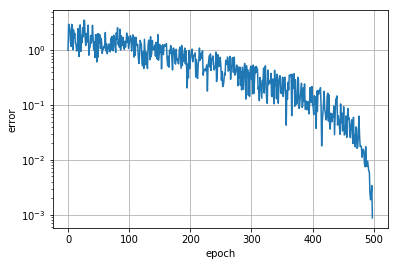

Number of timesteps: 74572
Final error: 0.000872312695027674


In [9]:
# Show a plot of the error at each epoch to show convergence, but this is guaranteed in SOM
# due to the learning rate and neighbourhood decay
plt.plot(convergence)
plt.ylabel('error')
plt.xlabel('epoch')
plt.grid(True)
plt.yscale('log')
plt.show()
print('Number of timesteps: ' + str(timestep))
print('Final error: ' + str(J))

Now we just have to plot the resulting map, i.e. the nodes and weights associated with the output layer.

Red = Iris-Setosa
Blue = Iris-Virginica
Green = Iris-Versicolor


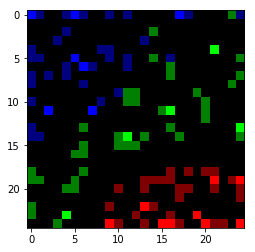

In [10]:
from scipy.misc import toimage
from PIL import Image


BMU = np.zeros([2],dtype=np.int32)
result_map = np.zeros([map_height,map_width,3],dtype=np.float32)

i=0
for pattern in patterns:
    
    pattern_ary = np.tile(pattern, (map_height, map_width, 1))
    Eucli_MAP = np.linalg.norm(pattern_ary - MAP_final, axis=2)

    # Get the best matching unit(BMU) which is the one with the smallest Euclidean distance
    BMU = np.unravel_index(np.argmin(Eucli_MAP, axis=None), Eucli_MAP.shape)
    
    x = BMU[0]
    y = BMU[1]
    
    if classes[i] == 0:
        if result_map[x][y][0] <= 0.5:
            result_map[x][y] += np.asarray([0.5,0,0])
    elif classes[i] == 1:
        if result_map[x][y][1] <= 0.5:
            result_map[x][y] += np.asarray([0,0.5,0])
    elif classes[i] == 2:
        if result_map[x][y][2] <= 0.5:
            result_map[x][y] += np.asarray([0,0,0.5])
    i+=1
result_map = np.flip(result_map,0)
    
#print result_map

print("Red = Iris-Setosa")
print("Blue = Iris-Virginica")
print("Green = Iris-Versicolor")

plt.imshow(result_map, interpolation='nearest')

$\textbf{U-matrix}$

As mentioned in the begining, we doing unsupervised learning often they key plot we use to analyse structure in the data is the U-matrix.

In [109]:
norm_Eucli_MAP = np.divide(Eucli_MAP,np.amax(Eucli_MAP))

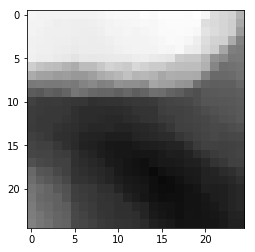

In [110]:
plt.imshow(norm_Eucli_MAP, cmap='gray', vmin=0, vmax=1)
plt.show()